In [1]:
import os
os.sys.path.append("../")
from scripts.preliminary_analysis import *


In [2]:
from pyspark.sql import SparkSession
#  Create a Spark Session
spark = (
    SparkSession.builder.appName("Preliminary Data Analysis")
    .config("spark.sql.repl.eagerEval.enabled", True)
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.driver.memory", "4g")
    .config("spark.executor.memory", "2g")
    .getOrCreate()
)

<<<<<<< local <modified: >


24/09/10 14:39:36 WARN Utils: Your hostname, qinsitaodeMacBook-Air.local resolves to a loopback address: 127.0.0.1; using 10.13.18.159 instead (on interface en0)
24/09/10 14:39:36 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/10 14:39:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/09/10 14:39:39 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/09/10 14:39:39 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


24/09/10 22:45:52 WARN Utils: Your hostname, Alistairs-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 10.13.156.189 instead (on interface en0)
24/09/10 22:45:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/10 22:45:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/09/10 22:45:53 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


>>>>>>> remote <modified: >


In [3]:
path = "../data/curated"

# Preliminary Data Analysis

In this notebook, we will conduct a preliminary data analysis on the data that we cleaned or are in the process of cleaning. The following statistics/visualisations will aid us in refining our cleaning pipeline, as well as help us to better understand our variables in preparation for analysis/modelling.

## Merchants

In [4]:
# Read merchant datasets in
merchant_info = spark.read.parquet(f"{path}/merchant_info.parquet")
merchant_fp = spark.read.parquet(f"{path}/merchant_fraud_prob.parquet")

# Summary Statistics
merchant_info.describe().show()
merchant_fp.describe().show()

# Closer look at proportion of merchants with fraud prob data
print(f'Total number of merchants: {merchant_info.select("merchant_abn").distinct().count()}')
print(f'Number of merchant with fraud probability in transactions: {merchant_fp.select("merchant_abn").distinct().count()}')

24/09/10 22:45:59 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+--------------------+--------------------+--------------------+-------------+------------------+
|summary|                name|        merchant_abn|            category|revenue_level|         take_rate|
+-------+--------------------+--------------------+--------------------+-------------+------------------+
|  count|                4026|                4026|                4026|         4026|              4026|
|   mean|                NULL|5.446186755874988E10|                NULL|         NULL| 4.397575757575758|
| stddev|                NULL|2.598938766039736E10|                NULL|         NULL|1.7825953679430884|
|    min|       A Aliquet Ltd|         10023283211|antique shops -  ...|            a|               0.1|
|    max|Vulputate Velit Inc.|         99990536339|watch, clock, and...|            e|               7.0|
+-------+--------------------+--------------------+--------------------+-------------+------------------+

+-------+--------------------+---------------

From the summary stats of the two merchant datasets, the notable columns are 'take_rate' and 'fraud_probability'. The other columns are not interpretable in terms of summary stats.

Looking at the mins/maxs of both these columns, they appear to fall within a reasonable defined range. More analysis will be required to have a closer look at their distributions. (Skewed or balanced).

We can see that there are only *61* merchants with a fraud probability out of *4026* which is only about *1%* This highlights the need to create a model to help us predict merchant fraud probability for imputation, which in turn will play a role in helping us determine which transactions are valid. 

In [5]:
<<<<<<< REMOTE CELL DELETED >>>>>>>
merchant = spark.read.parquet(f"{path}/merchant_info.parquet")
merchant_fp = spark.read.parquet(f"{path}/merchant_fraud_prob")

In [11]:
print(f'Total number of merchants: {merchant.select("merchant_abn").distinct().count()}')
print(f'Number of merchant with fraud probability in transactions: {merchant_fp.select("merchant_abn").distinct().count()}')

Total number of merchants: 4026
Number of merchant with fraud probability in transactions: 61


In [ ]:
<<<<<<< local
merchant_fp_avg = merchant_fp.groupBy("merchant_abn").agg(
=======
from pyspark.sql import functions as F

# Examine the frequency of fraud_prob for merchants and the average fraud prob accordingly
merchant_fp.groupBy("merchant_abn").agg(
>>>>>>> remote
    F.count(F.col("merchant_abn")).alias("num_transaction_with_prob"),
    F.avg("fraud_probability").alias("avg_prob")
)

<span style="color:red"><b><<<<<<< local</b></span>

In [12]:
merchant_fp_avg

merchant_abn,num_transaction_with_prob,avg_prob
99989036621,1,18.21089142894488
90568944804,3,30.72298492113958
29674997261,1,44.43787807900268
27093785141,3,28.88064813052203
19492220327,8,31.958306675667547
76968105359,1,68.27843632543912
97884414539,1,89.79919971536573
82999039227,1,94.1347004808891
83199298021,6,31.93490297074105
93292821052,1,66.58725735032715


In [ ]:
99989036621	

In [19]:
risk_analysis = merchant_fp_avg.join(merchant, on = 'merchant_abn', how='left')
risk_analysis

merchant_abn,num_transaction_with_prob,avg_prob,name,category,revenue_level,take_rate
99989036621,1,18.21089142894488,NULL,NULL,NULL,NULL
90568944804,3,30.72298492113958,Diam Eu Dolor LLC,tent and awning s...,b,4.1
29674997261,1,44.43787807900268,NULL,NULL,NULL,NULL
27093785141,3,28.88064813052203,Placerat Orci Ins...,"stationery, offic...",c,2.73
19492220327,8,31.958306675667547,Commodo Ipsum Ind...,"jewelry, watch, c...",b,4.93
76968105359,1,68.27843632543912,Nec Limited,health and beauty...,a,5.55
97884414539,1,89.79919971536573,Ut Corporation,antique shops - s...,a,6.82
82999039227,1,94.1347004808891,NULL,NULL,NULL,NULL
83199298021,6,31.93490297074105,Ligula Elit Preti...,antique shops - s...,b,4.82
93292821052,1,66.58725735032715,Purus Sapien Grav...,"furniture, home f...",c,1.54


In [23]:
risk_analysis.filter(F.col("name").isNull()).count()

13

24/09/10 16:21:36 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 478781 ms exceeds timeout 120000 ms
24/09/10 16:21:36 WARN SparkContext: Killing executors is not supported by current scheduler.
24/09/10 16:21:40 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$

<span style="color:red"><b>=======</b></span>

Though the table only displays a small proportion of data, 20 rows, it is clear that some merchants have more than one transaction with fraud probability. This will be taken into consideration when merging datasets for later analysis/modelling. 

On the surface, there does not seem to be a correlation between number of transactions with fraud and the average fraud prob, but this may be further explored later on.

Though the table is only showing 20 rows, we can see that there are merchants with more than one transaction with fraud probability. This mmight be helpful when it comes to deciding which merchant to be onboard.

Below is the summary statistic of the merchant fraud probability.

<span style="color:red"><b>>>>>>>> remote</b></span>

## Consumer

In [6]:
# Read cleaned consumer data in
consumer_fp = spark.read.parquet(f"{path}/consumer_fraud_prob.parquet")
consumer_info = spark.read.parquet(f"{path}/consumer_info.parquet")

# Summary statistics
consumer_fp.describe().show()
consumer_info.describe().show()

+-------+-----------------+-----------------+
|summary|fraud_probability|      consumer_id|
+-------+-----------------+-----------------+
|  count|            34864|            34864|
|   mean|15.12009064415455|751897.9451870124|
| stddev| 9.94608484957805|435809.7294939078|
|    min|8.287143531552802|               30|
|    max|99.24738020302328|          1499861|
+-------+-----------------+-----------------+



+-------+-------------+-----------------+-----------+------+------------------+
|summary|         name|      consumer_id|     gender| state|          postcode|
+-------+-------------+-----------------+-----------+------+------------------+
|  count|       499999|           499999|     499999|499999|            499999|
|   mean|         NULL|750895.2123184246|       NULL|  NULL|4037.0854181708364|
| stddev|         NULL|433100.4260141143|       NULL|  NULL|1791.0766391396735|
|    min|Aaron Acevedo|                4|     Female|   ACT|               200|
|    max|   Zoe Wright|          1499995|Undisclosed|    WA|              9999|
+-------+-------------+-----------------+-----------+------+------------------+



From the summary statistics above, the only column interpretable is 'fraud_probability'. 

We can see that fraud_probability is within a reasonable defined range, with a minimum of 8.28 and a maximum of about 99.24. Further discussion may be required to determine whether or not it would be beneficial to conduct outlier removal.

## Transactions

Summary statistic of consumers fraud probability.

In [7]:
# Read in transactions dataset
transactions = spark.read.parquet(f"{path}/transactions.parquet")

# Summary Statistics
transactions.select(F.col("dollar_value")).describe().show()

+-------+--------------------+
|summary|        dollar_value|
+-------+--------------------+
|  count|            12561377|
|   mean|  166.33982036554346|
| stddev|   520.3624254515656|
|    min|9.756658099412162E-8|
|    max|  105193.88578925544|
+-------+--------------------+



From the summary statistics observed, we can see that dollar value has a minimum of $0.00000009.

This is significantly lower than even 1 cent. Therefore, it would appear to be appropriate to consider rows which such value as invalid. 

However, as values like these could be indicators of fraudulent transactions, we should consider retaining these rows to help us later on with predicting fraud. We will revisit this after joining our datasets and understand the relationships between variables better.

In [ ]:
"""

avg_revenue_level = merchant_info.groupBy("revenue_level").agg(
    F.count(F.col("commission_amount")).alias("num_merchant"),
    F.sum(F.col("total_orders")).alias("total_orders"),
    F.round(F.avg(F.col("commission_amount")),2).alias("avg_commission_amount"),
    F.round(F.sum(F.col("commission_amount")),2).alias("total_commission_amount"),
)
# avg_revenue_level = avg_revenue_level.withColumn("total_commission_amount", F.format_number("total_commission_amount", 2))
avg_revenue_level.withColumns(
    {"avg_commission_amount": F.format_number("avg_commission_amount",2),
    "total_commission_amount": F.format_number("total_commission_amount",2),}
)

"""

'\n\navg_revenue_level = merchant_info.groupBy("revenue_level").agg(\n    F.count(F.col("commission_amount")).alias("num_merchant"),\n    F.sum(F.col("total_orders")).alias("total_orders"),\n    F.round(F.avg(F.col("commission_amount")),2).alias("avg_commission_amount"),\n    F.round(F.sum(F.col("commission_amount")),2).alias("total_commission_amount"),\n)\n# avg_revenue_level = avg_revenue_level.withColumn("total_commission_amount", F.format_number("total_commission_amount", 2))\navg_revenue_level.withColumns(\n    {"avg_commission_amount": F.format_number("avg_commission_amount",2),\n    "total_commission_amount": F.format_number("total_commission_amount",2),}\n)\n\n'

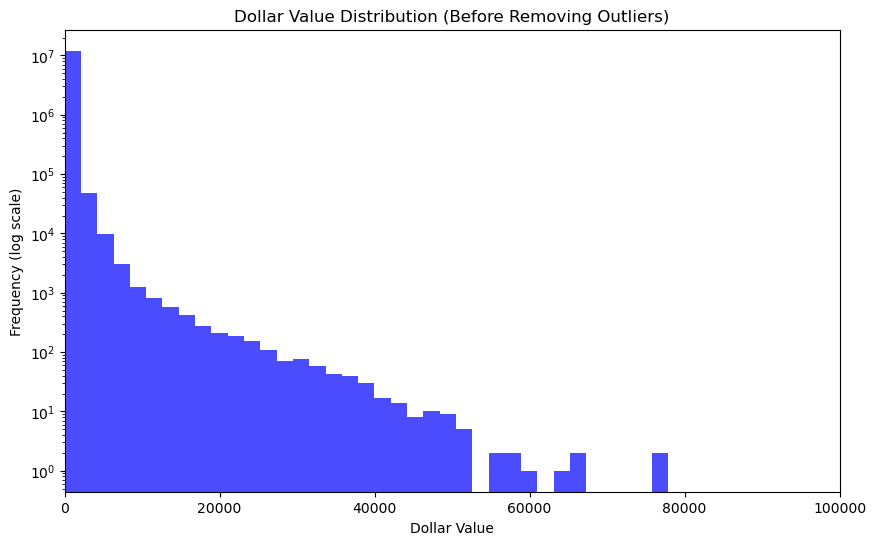

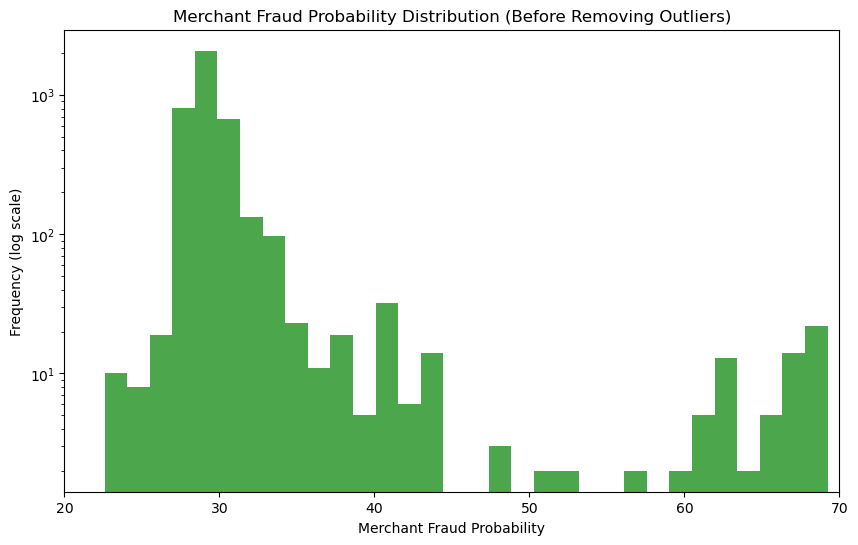

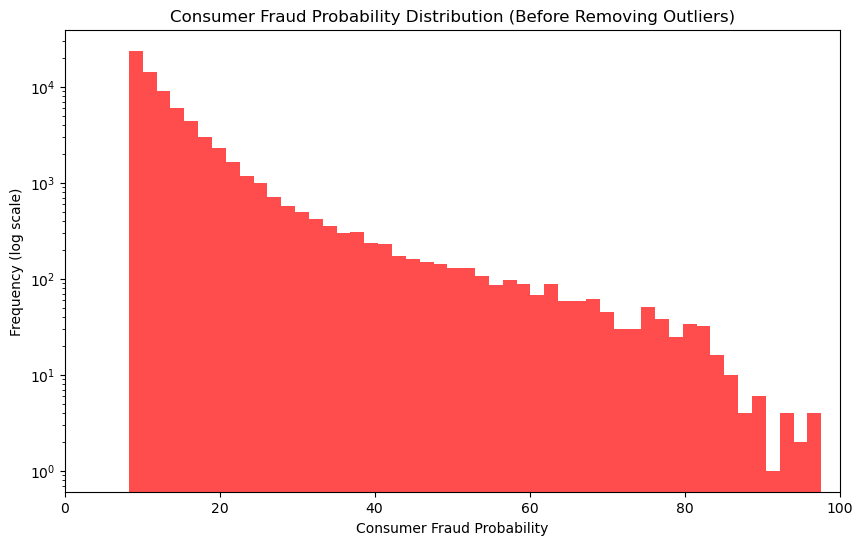

In [17]:
import matplotlib.pyplot as plt

# Convert columns to Pandas for plotting
df_pandas = transaction_records_final.select("dollar_value", "merchant_fraud_probability", "consumer_fraud_probability").toPandas()

# Plot the distribution for dollar_value with better scaling
plt.figure(figsize=(10, 6))
plt.hist(df_pandas['dollar_value'], bins=50, color='blue', alpha=0.7, log=True)  # Apply log scale to y-axis
plt.title("Dollar Value Distribution (Before Removing Outliers)")
plt.xlabel("Dollar Value")
plt.ylabel("Frequency (log scale)")
plt.xlim([0, 100000])  # Adjust x-axis limits
plt.show()

# Plot the distribution for fraud_probability (merchant) with better scaling
plt.figure(figsize=(10, 6))
plt.hist(df_pandas['merchant_fraud_probability'], bins=50, color='green', alpha=0.7, log=True)  # Apply log scale to y-axis
plt.title("Merchant Fraud Probability Distribution (Before Removing Outliers)")
plt.xlabel("Merchant Fraud Probability")
plt.ylabel("Frequency (log scale)")
plt.xlim([20, 70])  # Adjust x-axis limits
plt.show()

# Plot the distribution for fraud_probability (consumer) with better scaling
plt.figure(figsize=(10, 6))
plt.hist(df_pandas['consumer_fraud_probability'], bins=50, color='red', alpha=0.7, log=True)  # Apply log scale to y-axis
plt.title("Consumer Fraud Probability Distribution (Before Removing Outliers)")
plt.xlabel("Consumer Fraud Probability")
plt.ylabel("Frequency (log scale)")
plt.xlim([0, 100])  # Adjust x-axis limits
plt.show()


# Exploratory data analysis

In [9]:
# Rename fraud_probability in the merchant fraud dataset to 'merchant_fraud_probability'
merchant_fp = merchant_fp.withColumnRenamed("fraud_probability", "merchant_fraud_probability")

# Rename fraud_probability in the consumer fraud dataset to 'consumer_fraud_probability'
consumer_fp = consumer_fp.withColumnRenamed("fraud_probability", "consumer_fraud_probability")

# Merge Datasets

In [16]:
# Check initial dataset size
print("Original dataset:")
get_dataset_count(transactions)
print("\n")

# Join transaction_records with consumer fraud data
transaction_records_with_consumer_fraud = transactions.join(
    consumer_fp, 
    on=["consumer_id", "order_datetime"], 
    how="left"
)

print("After consumer_fp join:")

# See how the dataset size changes along the way
get_dataset_count(transaction_records_with_consumer_fraud)

# Preview
transaction_records_with_consumer_fraud.show(5)

# Check if the join led to any missing values.
calculate_missing_values(transaction_records_with_consumer_fraud)

# Join transaction records with merchant fraud data
transaction_records_with_fraud = transaction_records_with_consumer_fraud.join(
    merchant_fp, 
    on=["merchant_abn", "order_datetime"], 
    how="left"
)

print("After merchant_fp join:")

# See how the dataset size changes along the way
get_dataset_count(transaction_records_with_fraud)

# Preview
transaction_records_with_fraud.show(5)

# Check if the join led to any missing values.
calculate_missing_values(transaction_records_with_fraud)

# Join transaction records with merchant info
transaction_records_final = transaction_records_with_fraud.join(
    merchant_info, 
    on="merchant_abn", 
    how="inner"
)

print("After merchant_info join:")

# See how the dataset size changes along the way
get_dataset_count(transaction_records_final)

# Preview
transaction_records_final.show(5)

# See how the dataset size changes along the way
# Check if the join led to any missing values.
calculate_missing_values(transaction_records_final)

Original dataset:
The dataset count is  12561377


After consumer_fp join:


The dataset count is  12561589
+-----------+--------------+------------+------------------+--------------------+--------------------------+
|consumer_id|order_datetime|merchant_abn|      dollar_value|            order_id|consumer_fraud_probability|
+-----------+--------------+------------+------------------+--------------------+--------------------------+
|    1059280|    2021-11-26| 79417999332|136.06570809815838|23acbb7b-cf98-458...|                      NULL|
|    1195503|    2021-11-26| 46451548968| 72.61581642788431|76bab304-fa2d-400...|                      NULL|
|     986886|    2021-11-26| 89518629617|3.0783487174439297|a2ae446a-2959-41c...|                      NULL|
|    1195503|    2021-11-26| 49167531725| 51.58228625503599|7080c274-17f7-4cc...|                      NULL|
|     986886|    2021-11-26| 31101120643|25.228114942417797|8e301c0f-06ab-45c...|                      NULL|
+-----------+--------------+------------+------------------+--------------------+----------------

+-------------------------+----------------------------+--------------------------+--------------------------+----------------------+----------------------------------------+
|consumer_id_missing_count|order_datetime_missing_count|merchant_abn_missing_count|dollar_value_missing_count|order_id_missing_count|consumer_fraud_probability_missing_count|
+-------------------------+----------------------------+--------------------------+--------------------------+----------------------+----------------------------------------+
|                        0|                           0|                         0|                         0|                     0|                                12481029|
+-------------------------+----------------------------+--------------------------+--------------------------+----------------------+----------------------------------------+

After merchant_fp join:


The dataset count is  12561589
+------------+--------------+-----------+------------------+--------------------+--------------------------+--------------------------+
|merchant_abn|order_datetime|consumer_id|      dollar_value|            order_id|consumer_fraud_probability|merchant_fraud_probability|
+------------+--------------+-----------+------------------+--------------------+--------------------------+--------------------------+
| 79417999332|    2021-11-26|    1059280|136.06570809815838|23acbb7b-cf98-458...|                      NULL|                      NULL|
| 46451548968|    2021-11-26|    1195503| 72.61581642788431|76bab304-fa2d-400...|                      NULL|                      NULL|
| 89518629617|    2021-11-26|     986886|3.0783487174439297|a2ae446a-2959-41c...|                      NULL|                      NULL|
| 49167531725|    2021-11-26|    1195503| 51.58228625503599|7080c274-17f7-4cc...|                      NULL|                      NULL|
| 31101120643|   

+--------------------------+----------------------------+-------------------------+--------------------------+----------------------+----------------------------------------+----------------------------------------+
|merchant_abn_missing_count|order_datetime_missing_count|consumer_id_missing_count|dollar_value_missing_count|order_id_missing_count|consumer_fraud_probability_missing_count|merchant_fraud_probability_missing_count|
+--------------------------+----------------------------+-------------------------+--------------------------+----------------------+----------------------------------------+----------------------------------------+
|                         0|                           0|                        0|                         0|                     0|                                12481029|                                12557495|
+--------------------------+----------------------------+-------------------------+--------------------------+----------------------+---

The dataset count is  12047496
+------------+--------------+-----------+------------------+--------------------+--------------------------+--------------------------+--------------------+--------------------+-------------+---------+
|merchant_abn|order_datetime|consumer_id|      dollar_value|            order_id|consumer_fraud_probability|merchant_fraud_probability|                name|            category|revenue_level|take_rate|
+------------+--------------+-----------+------------------+--------------------+--------------------------+--------------------------+--------------------+--------------------+-------------+---------+
| 79417999332|    2021-11-26|    1059280|136.06570809815838|23acbb7b-cf98-458...|                      NULL|                      NULL|Phasellus At Company|gift, card, novel...|            b|     4.95|
| 46451548968|    2021-11-26|    1195503| 72.61581642788431|76bab304-fa2d-400...|                      NULL|                      NULL|Tempus Eu Ligula ...|healt

+--------------------------+----------------------------+-------------------------+--------------------------+----------------------+----------------------------------------+----------------------------------------+------------------+----------------------+---------------------------+-----------------------+
|merchant_abn_missing_count|order_datetime_missing_count|consumer_id_missing_count|dollar_value_missing_count|order_id_missing_count|consumer_fraud_probability_missing_count|merchant_fraud_probability_missing_count|name_missing_count|category_missing_count|revenue_level_missing_count|take_rate_missing_count|
+--------------------------+----------------------------+-------------------------+--------------------------+----------------------+----------------------------------------+----------------------------------------+------------------+----------------------+---------------------------+-----------------------+
|                         0|                           0|             

In [11]:
# Revenue analysis
merchant_performance = transaction_records_final.groupBy("merchant_abn").agg(
    F.sum("dollar_value").alias("total_revenue"),
    F.avg("dollar_value").alias("average_order_value"),
    F.count("dollar_value").alias("total_orders")
)

# Rank merchants by total revenue in descending order
merchant_performance = merchant_performance.orderBy(F.col("total_revenue").desc())
merchant_performance.show(10)

+------------+-----------------+-------------------+------------+
|merchant_abn|    total_revenue|average_order_value|total_orders|
+------------+-----------------+-------------------+------------+
| 39649557865| 8713454.72918194|  449.1471509887598|       19400|
| 31334588839|  8710106.7140746|  6413.922469863476|        1358|
| 27093785141|8695204.207713192|  377.1668347233969|       23054|
| 96680767841|8679874.166938104| 315.16191013173466|       27541|
| 79827781481|8657277.096810075| 2036.5271928511113|        4251|
| 32709545238|8600648.766611947|  751.2139721034105|       11449|
| 82368304209|8559519.374213614| 1865.6319473002645|        4588|
| 50315283629|8513752.395678477|  322.3685117636682|       26410|
| 90568944804|8510417.447779242|  898.9561051842444|        9467|
| 38700038932|8482176.655705512| 1337.6717640286251|        6341|
+------------+-----------------+-------------------+------------+
only showing top 10 rows



In [12]:
# Risk analysis
merchant_performance_risk = transaction_records_final.groupBy("merchant_abn").agg(
    F.avg("merchant_fraud_probability").alias("merchant_avg_fraud_prob"),
    F.avg("consumer_fraud_probability").alias("consumer_avg_fraud_prob"),
    F.sum("dollar_value").alias("total_revenue"),
    F.avg("dollar_value").alias("average_order_value"),
    F.count("dollar_value").alias("total_orders")
)

# Rank merchants by fraud probability in descending order
merchant_performance_risk = merchant_performance_risk.orderBy(F.col("merchant_avg_fraud_prob").desc())
merchant_performance_risk.show(10)

+------------+-----------------------+-----------------------+------------------+-------------------+------------+
|merchant_abn|merchant_avg_fraud_prob|consumer_avg_fraud_prob|     total_revenue|average_order_value|total_orders|
+------------+-----------------------+-----------------------+------------------+-------------------+------------+
| 35575706403|      91.09606847149965|     34.776805865701846| 806977.6688917434| 11867.318660172697|          68|
| 97884414539|      89.79919971536573|      32.40204688123495| 668322.1558769114| 11724.950103103709|          57|
| 14530561097|      80.80054474543395|      31.83820084048247|1900373.3585338441| 11379.481188825413|         167|
| 18737319630|      72.73069736562613|      9.716308521768319| 39719.82955985059|  201.6235003038101|         197|
| 85482742429|      70.88131110541714|     13.662992056430278| 34194.42789673934|  71.53646003501954|         478|
| 78080443264|      69.09531723361212|     12.295498809402012| 19336.11299420864

In [13]:
# Profitability analysis
# Calculate net revenue at the transaction level before aggregation
transaction_records_final = transaction_records_final.withColumn(
    "net_revenue", F.col("dollar_value") * F.col("take_rate")/100
)

# Aggregate net_revenue at the merchant level
merchant_profitability = transaction_records_final.groupBy("merchant_abn").agg(
    F.sum("net_revenue").alias("total_net_revenue"),
    F.sum("dollar_value").alias("total_revenue"),
    F.avg("dollar_value").alias("average_order_value"),
    F.count("dollar_value").alias("total_orders"),
    F.avg("merchant_fraud_probability").alias("merchant_avg_fraud_prob"),
    F.avg("consumer_fraud_probability").alias("consumer_avg_fraud_prob")
)

# Rank merchants by profitability in descending order
merchant_profitability.orderBy(F.col("total_net_revenue").desc()).show(10)

+------------+------------------+-----------------+-------------------+------------+-----------------------+-----------------------+
|merchant_abn| total_net_revenue|    total_revenue|average_order_value|total_orders|merchant_avg_fraud_prob|consumer_avg_fraud_prob|
+------------+------------------+-----------------+-------------------+------------+-----------------------+-----------------------+
| 79827781481| 590426.2980024472|8657277.096810075| 2036.5271928511113|        4251|     29.694380203418124|      12.77383070226627|
| 48534649627| 552231.2486106261|8316735.671846778| 141.71825290699118|       58685|     28.576898179225296|     14.902087132634948|
| 32361057556| 551286.8853157675|8340194.936698442| 109.94917852084164|       75855|                   NULL|     15.816853351282546|
| 86578477987| 542906.0687302663|8443329.218200121|  34.98505938982652|      241341|                   NULL|     15.121133124846919|
| 38700038932| 535225.3469750177|8482176.655705512| 1337.671764028625

In [18]:
merchant_info.groupBy(F.col("revenue_level")).agg(F.avg(F.col("take_rate"))) # average commission rate of each revenue level

revenue_level,avg(take_rate)
e,0.3147169811320755
d,0.9912244897959185
c,2.2512039045553167
b,4.094056254626199
a,6.232297128589269


In [ ]:
net_revenue_level = merchant_profitability.groupBy('revenue_level').sum('net_revenue') #sum up the net_revenue of BNPL firm for each level
net_revenue_level
#Data shows that make the most net_revenue from small 

In [ ]:
# Count the occurrences of each revenue level
merchant_profitability.groupBy('revenue_level').count()

In [ ]:
# Count the number of merchants with a fraud probability
fraudulent_merchants_count = merchant_profitability.filter(col("merchant_avg_fraud_prob").isNotNull()).select("merchant_abn").distinct().count()

fraudulent_merchants_count

In [ ]:
# # Compute the average fraud probability for each revenue level
average_fraud_by_revenue_level = merchant_profitability.groupBy(F.col("revenue_level")).agg(F.avg(F.col("merchant_avg_fraud_prob")).alias("merchant_avg_fraud_prob"))

# Show the results
average_fraud_by_revenue_level.show()

In [ ]:
# Compute the total number of orders for each revenue level
total_orders_by_revenue_level = merchant_profitability.groupBy(F.col("revenue_level")) \
    .agg(F.sum(F.col("total_orders")).alias("total_orders"))

# Show the results
total_orders_by_revenue_level.show()

joined_df = net_revenue_level.join(
    total_orders_by_revenue_level,
    on="revenue_level",
    how="inner"
)
joined_df = joined_df.withColumn("total_orders", F.col("total_orders").cast(DoubleType()))

# Compute the average order value
average_order_value = joined_df.withColumn(
    "avg_order_value",
    F.col("sum(net_revenue)")/ F.col("total_orders")
)

average_order_value
